<a href="https://colab.research.google.com/github/Himanshi11045/Traffic_Prediction/blob/main/TRAFFIC_PREDICTIONipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTS AND DATASET

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.base import BaseEstimator, TransformerMixin, ClassifierMixin, clone
from sklearn.model_selection import KFold
from scipy import stats
from scipy.stats import norm, skew
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectFromModel
import warnings
warnings.filterwarnings('ignore')

In [ ]:
for i in range(1,11):
  print(i)

In [ ]:
train = pd.read_csv('/content/Traffic.csv')
train

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal
...,...,...,...,...,...,...,...,...,...
2971,10:45:00 PM,9,Thursday,16,3,1,36,56,normal
2972,11:00:00 PM,9,Thursday,11,0,1,30,42,normal
2973,11:15:00 PM,9,Thursday,15,4,1,25,45,normal
2974,11:30:00 PM,9,Thursday,16,5,0,27,48,normal


In [ ]:
train, test = train_test_split(train,test_size=0.2,random_state=42)
print("Shape of train: ",train.shape)
print("Shape of test",test.shape)

Shape of train:  (2380, 9)
Shape of test (596, 9)


DATA CLEANING

In [ ]:
train.isnull().sum()

Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64

In [ ]:
test.isnull().sum()

Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64

VISUALIZATION

<Axes: xlabel='Time', ylabel='Count'>

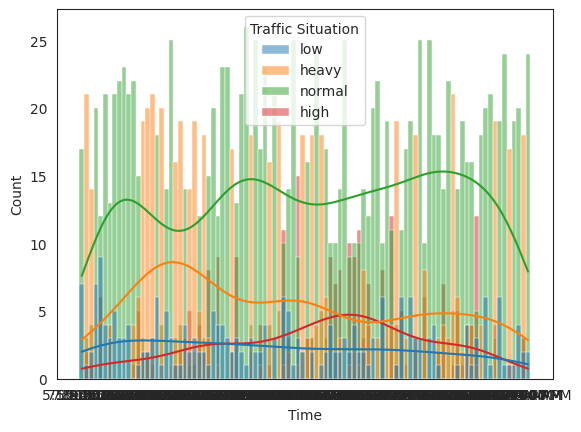

In [ ]:
sns.histplot(train,x='Time',hue='Traffic Situation',kde=True)


<Axes: xlabel='CarCount', ylabel='Count'>

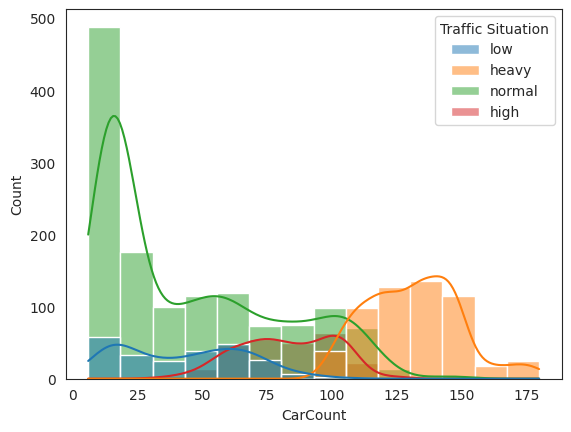

In [ ]:
sns.histplot(train,x='CarCount',hue='Traffic Situation',kde=True)


<Axes: xlabel='BikeCount', ylabel='Count'>

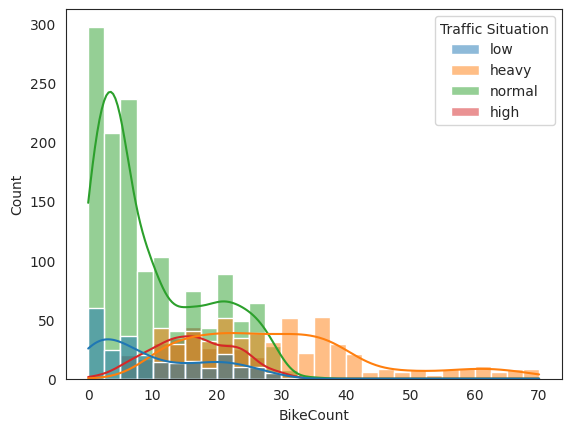

In [ ]:
sns.histplot(train,x='BikeCount',hue='Traffic Situation',kde=True)


<Axes: xlabel='BusCount', ylabel='Count'>

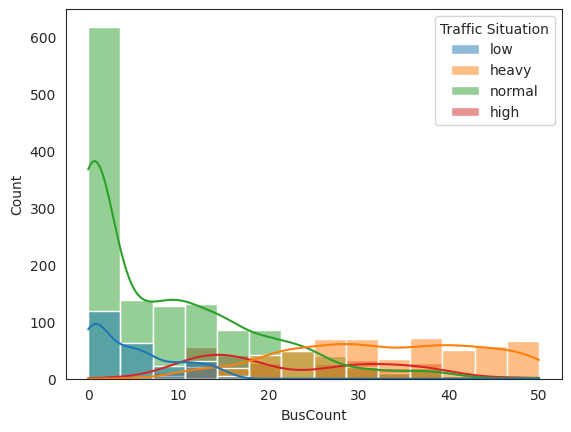

In [ ]:

sns.histplot(train,x='BusCount',hue='Traffic Situation',kde=True)


<Axes: xlabel='TruckCount', ylabel='Count'>

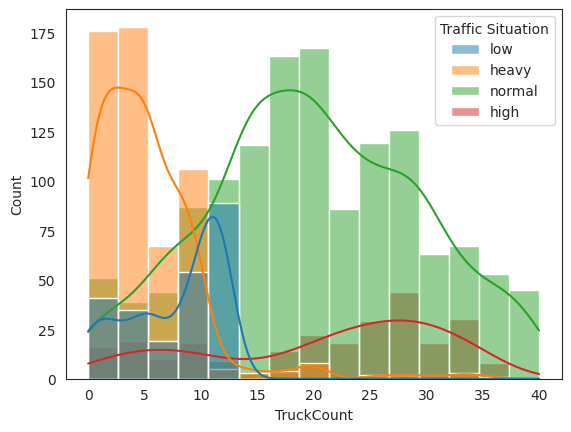

In [ ]:
sns.histplot(train,x='TruckCount',hue='Traffic Situation',kde=True)


PREPROCESSING

In [ ]:

df_temp=train
df_temp['Day of the week'] = df_temp['Day of the week'].replace({'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday': 6,'Sunday':7})
df_temp['Traffic Situation'] = df_temp['Traffic Situation'].replace({'low': 0,'normal': 1,'high': 2, 'heavy':3})
train=df_temp
train

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
1557,5:15:00 AM,26,4,64,27,5,5,101,0
509,7:15:00 AM,15,7,150,13,31,4,198,3
2044,7:00:00 AM,31,2,134,10,44,0,188,3
1847,5:45:00 AM,29,7,108,24,2,19,153,1
2097,8:15:00 PM,31,2,80,14,20,15,129,1
...,...,...,...,...,...,...,...,...,...
1638,1:30:00 AM,27,5,20,2,0,17,39,1
1095,9:45:00 AM,21,7,98,21,10,5,134,1
1130,6:30:00 PM,21,7,116,22,23,7,168,3
1294,11:30:00 AM,23,1,40,9,15,28,92,1


FEATURE SELECTION

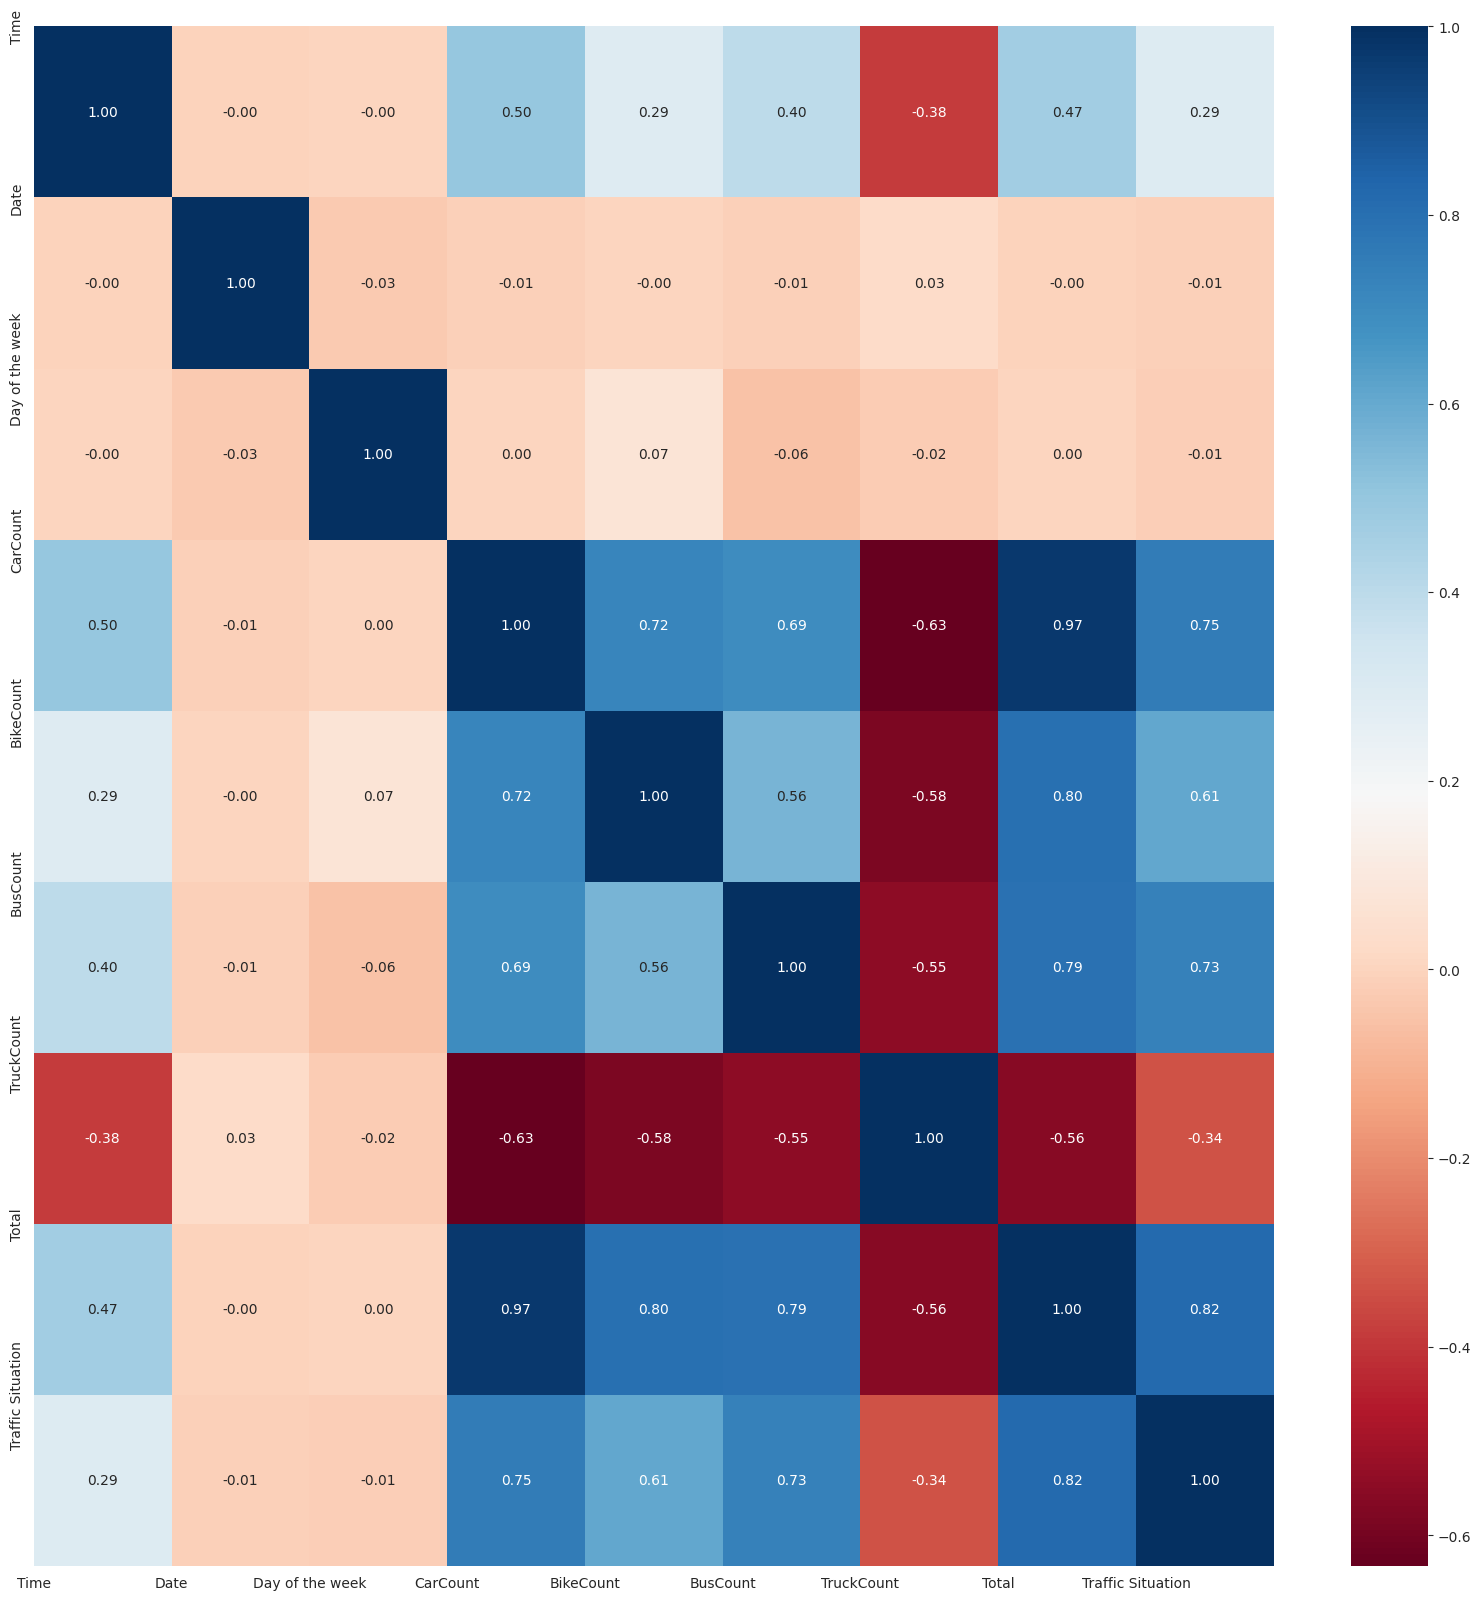

In [ ]:
train_temp=train

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_temp['Time'] = le.fit_transform(train_temp['Time'])

corr = train_temp.corr(method='pearson')
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [ ]:
train = train.drop(columns=["Day of the week"],axis=1)
train

,Time,Date,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
1557,58,26,64,27,5,5,101,0
509,74,15,150,13,31,4,198,3
2044,72,31,134,10,44,0,188,3
1847,62,29,108,24,2,19,153,1
2097,83,31,80,14,20,15,129,1
...,...,...,...,...,...,...,...,...
1638,28,27,20,2,0,17,39,1
1095,94,21,98,21,10,5,134,1
1130,69,21,116,22,23,7,168,3
1294,12,23,40,9,15,28,92,1


In [ ]:
train["Traffic Situation"].value_counts()

1    1329
3     555
2     258
0     238
Name: Traffic Situation, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Displaying the class distribution before and after SMOTE
print("Class distribution before SMOTE:\n", y.value_counts())
print("\nClass distribution after SMOTE:\n", y_resampled.value_counts())

X = X_resampled
y = y_resampled

Class distribution before SMOTE:
 1    1329
3     555
2     258
0     238
Name: Traffic Situation, dtype: int64

Class distribution after SMOTE:
 0    1329
3    1329
1    1329
2    1329
Name: Traffic Situation, dtype: int64


In [ ]:
X = train.drop(columns=["Traffic Situation"],axis=1)
y = train["Traffic Situation"]

In [ ]:
X_train=X
y_train=y

from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()
X_train = StandardScaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_train

,0,1,2,3,4,5,6
0,0.165717,1.172373,-0.257199,0.866764,-0.828674,-0.777412,-0.350124
1,0.743223,-0.103485,1.719950,-0.248250,0.986448,-0.873239,1.267099
2,0.671034,1.752309,1.352109,-0.487182,1.894009,-1.256547,1.100375
3,0.310093,1.520334,0.754366,0.627832,-1.038111,0.564163,0.516841
4,1.068070,1.752309,0.110643,-0.168607,0.218512,0.180856,0.116704
...,...,...,...,...,...,...,...
5311,0.418375,-1.263356,1.536029,0.946408,1.335510,-0.585759,1.533858
5312,-0.881013,-0.683421,1.030247,0.707476,0.358136,0.372510,1.033686
5313,1.104164,-0.915395,1.099217,0.548189,0.358136,-1.160720,0.800272
5314,0.021340,-0.683421,0.800346,-0.248250,1.754384,-0.489932,0.883634


SPLITTING DATASET

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_eval, y_train, y_eval = train_test_split(X_train, y_train,test_size=0.2,random_state=2019)
print("Shape of X_train: ",X_train.shape)
print("Shape of X_eval: ", X_eval.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_eval",y_eval.shape)

Shape of X_train:  (4252, 7)
Shape of X_eval:  (1064, 7)
Shape of y_train:  (4252,)
Shape of y_eval (1064,)


In [ ]:
y_train =pd.DataFrame(y_train)
y_eval =pd.DataFrame(y_eval)

LOGISTIC REGRESSION

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

X= train.drop(columns=["Traffic Situation"],axis=1)
y= train["Traffic Situation"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')



Accuracy: 0.8781512605042017
Confusion Matrix:
[[ 31   6   0   0]
 [ 17 245   5   7]
 [  0  13  26   7]
 [  0   0   3 116]]
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.84      0.73        37
           1       0.93      0.89      0.91       274
           2       0.76      0.57      0.65        46
           3       0.89      0.97      0.93       119

    accuracy                           0.88       476
   macro avg       0.81      0.82      0.81       476
weighted avg       0.88      0.88      0.88       476



KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


# Creating and training the KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Make predictions
knn_predictions = knn_model.predict(X_test)

# Accuracy
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("KNN Accuracy:", knn_accuracy)

# Confusion Matrix
knn_conf_matrix = confusion_matrix(y_test, knn_predictions)
print("KNN Confusion Matrix:")
print(knn_conf_matrix)

# Classification Report
knn_class_report = classification_report(y_test, knn_predictions)
print("KNN Classification Report:")
print(knn_class_report)


KNN Accuracy: 0.9201680672268907
KNN Confusion Matrix:
[[ 29   8   0   0]
 [ 12 254   4   4]
 [  0   5  40   1]
 [  0   1   3 115]]
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.78      0.74        37
           1       0.95      0.93      0.94       274
           2       0.85      0.87      0.86        46
           3       0.96      0.97      0.96       119

    accuracy                           0.92       476
   macro avg       0.87      0.89      0.88       476
weighted avg       0.92      0.92      0.92       476



SVM

In [ ]:
from sklearn.svm import SVC

# Create and train the SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Make predictions
svm_predictions = svm_model.predict(X_test)

# Accuracy
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)

# Confusion Matrix
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)
print("SVM Confusion Matrix:")
print(svm_conf_matrix)

# Classification Report
svm_class_report = classification_report(y_test, svm_predictions)
print("SVM Classification Report:")
print(svm_class_report)


SVM Accuracy: 0.9012605042016807
SVM Confusion Matrix:
[[ 23  14   0   0]
 [  5 256   5   8]
 [  0  10  33   3]
 [  0   0   2 117]]
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.62      0.71        37
           1       0.91      0.93      0.92       274
           2       0.82      0.72      0.77        46
           3       0.91      0.98      0.95       119

    accuracy                           0.90       476
   macro avg       0.87      0.81      0.84       476
weighted avg       0.90      0.90      0.90       476



NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Create and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions
nb_predictions = nb_model.predict(X_test)

# Accuracy
nb_accuracy = accuracy_score(y_test, nb_predictions)
print("Naive Bayes Accuracy:", nb_accuracy)

# Confusion Matrix
nb_conf_matrix = confusion_matrix(y_test, nb_predictions)
print("Naive Bayes Confusion Matrix:")
print(nb_conf_matrix)

# Classification Report
nb_class_report = classification_report(y_test, nb_predictions)
print("Naive Bayes Classification Report:")
print(nb_class_report)


Naive Bayes Accuracy: 0.8004201680672269
Naive Bayes Confusion Matrix:
[[ 25  12   0   0]
 [  6 205  53  10]
 [  0   4  36   6]
 [  0   0   4 115]]
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.68      0.74        37
           1       0.93      0.75      0.83       274
           2       0.39      0.78      0.52        46
           3       0.88      0.97      0.92       119

    accuracy                           0.80       476
   macro avg       0.75      0.79      0.75       476
weighted avg       0.85      0.80      0.81       476



DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create and train the Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Make predictions
dt_predictions = dt_model.predict(X_test)

# Accuracy
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)

# Confusion Matrix
dt_conf_matrix = confusion_matrix(y_test, dt_predictions)
print("Decision Tree Confusion Matrix:")
print(dt_conf_matrix)

# Classification Report
dt_class_report = classification_report(y_test, dt_predictions)
print("Decision Tree Classification Report:")
print(dt_class_report)



Decision Tree Accuracy: 0.9936974789915967
Decision Tree Confusion Matrix:
[[ 37   0   0   0]
 [  0 271   0   3]
 [  0   0  46   0]
 [  0   0   0 119]]
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      0.99      0.99       274
           2       1.00      1.00      1.00        46
           3       0.98      1.00      0.99       119

    accuracy                           0.99       476
   macro avg       0.99      1.00      1.00       476
weighted avg       0.99      0.99      0.99       476



In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

sample_new_data = pd.DataFrame({
    'Time': [13],  # 'Time' is a feature and 13 is a sample value
    'Date': [3],
    'CarCount': [45],
    'BikeCount': [2],
    'BusCount': [8],
    'TruckCount': [10],
    'Total': [65]
})

le_traffic = LabelEncoder()
train['Traffic_encoded'] = le_traffic.fit_transform(train['Traffic Situation'])

# Predictions on the sample new data

predicted_traffic_encoded = dt_model.predict(sample_new_data)

# Inverse transform predicted traffic situation to get the original label
predicted_traffic = le_traffic.inverse_transform(predicted_traffic_encoded)
print("Predicted Traffic Situation:", predicted_traffic)


Predicted Traffic Situation: [0]


0 - LOW

1 - NORMAL

2 - HIGH

3 - HEAVY